# ETL

Importamos las librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import ast

Importamos dataset a utilizar y revisamos la información necesaria de los mismos

In [2]:
data_movies=pd.read_csv(r'movies_dataset.csv', sep=',', encoding='utf8')
data_credits=pd.read_csv(r'credits.csv', sep=',', encoding='utf8')

C:\Users\manue\AppData\Local\Temp\ipykernel_9388\3148438680.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movies=pd.read_csv(r'movies_dataset.csv', sep=',', encoding='utf8')


In [3]:
#revisamos la cantidad de registros de cada uno
print(data_movies.shape, data_credits.shape)

(45466, 24) (45476, 3)


In [4]:
data_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
data_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Revisamos los campos nulos en `title` comparando con los correspondientes de la columna `original title` y `id`

In [7]:
#filtramos el dataset donde title esta vacio
data_movies[['id','original_title','title','release_date']][data_movies['title'].isna()]

,id,original_title,title,release_date
19729,82663,Midnight Man,NaN,NaN
19730,1997-08-20,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,1
29502,122662,マルドゥック・スクランブル 排気,NaN,NaN
29503,2012-09-29,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,12
35586,249260,Avalanche Sharks,NaN,NaN
35587,2014-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,22


In [8]:
#eliminamos los campos con errores (aquellos cuyo id no son tipo entero y que ademas tienen errores en title y original_title)
data_movies['id']=pd.to_numeric(data_movies['id'], errors='coerce')
data_movies=data_movies.dropna(subset=['id'])

In [9]:
#reemplazamos los campos vacios en title por el correspondiente en original_title
data_movies['title'].fillna(data_movies['original_title'], inplace=True)

In [10]:
#Aplicamos strip a los titulos
data_movies['title']=data_movies['title'].apply(lambda x: x.strip())

In [11]:
data_movies.shape

(45463, 24)

Eliminamos las columnas irrelevantes para el analisis:

In [12]:
columnas_irrelevantes=['video','imdb_id','adult','original_title','poster_path','homepage']
data_movies.drop(columnas_irrelevantes, axis=1, inplace=True)

Analizamos las columnas con mayor detalle

In [13]:
#Creamos una función para evaluar datos nulos y repetidos en cada columna
def eval_registros(df):
    columnas=df.columns
    for columna in columnas:
        count_null = df[columna].isnull().sum()
        count_t = df[columna].shape[0]
        count_r=df[columna].duplicated().sum()
        count_unic = count_t-count_r
        print('La columna {} tiene {} registros nulos, un total de {} datos unicos y {} registros repetidos entre ellos'.format(columna, count_null, count_unic, count_r))

Rellenamos los valores nulos en revenue por el número 0, para luego crear la columna con el retorno de inversión `return=revenue/budget`

In [14]:
# Rellenamos los valores nulos
data_movies['revenue']=data_movies['revenue'].fillna(0)

#cambiamos el tipo de dato
data_movies['budget']=data_movies['budget'].astype(np.int64) 
data_movies['revenue']=data_movies['revenue'].astype(np.int64)

#calculamos return
data_movies['return'] = data_movies.apply(lambda x: x['revenue'] / x['budget'] if x['budget'] != 0 else 0, axis=1)

Eliminamos los valores nulos del campo `release date`, cambiamos a formato fecha y creamos una nueva columna con el año de la fecha de estreno.

In [15]:
#eliminamos los valores nulos
data_movies=data_movies.dropna(subset=['release_date'])

#cambiamos el formato 
data_movies['release_date']=pd.to_datetime(data_movies['release_date'])

#creamos la columna con anio de estreno
data_movies['release_year']=data_movies['release_date'].dt.year
data_movies['release_year'].astype(np.int16)

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45460    1991
45462    2011
45463    2003
45464    1917
45465    2017
Name: release_year, Length: 45376, dtype: int16

In [16]:
#revisamos el dataset luego de los cambios
eval_registros(data_movies)

La columna belongs_to_collection tiene 40888 registros nulos, un total de 1696 datos unicos y 43680 registros repetidos entre ellos
La columna budget tiene 0 registros nulos, un total de 1223 datos unicos y 44153 registros repetidos entre ellos
La columna genres tiene 0 registros nulos, un total de 4065 datos unicos y 41311 registros repetidos entre ellos
La columna id tiene 0 registros nulos, un total de 45346 datos unicos y 30 registros repetidos entre ellos
La columna original_language tiene 11 registros nulos, un total de 90 datos unicos y 45286 registros repetidos entre ellos
La columna overview tiene 941 registros nulos, un total de 44233 datos unicos y 1143 registros repetidos entre ellos
La columna popularity tiene 0 registros nulos, un total de 44142 datos unicos y 1234 registros repetidos entre ellos
La columna production_companies tiene 0 registros nulos, un total de 22703 datos unicos y 22673 registros repetidos entre ellos
La columna production_countries tiene 0 registros 

Combinamos los dos datasets (movies y credits)

In [17]:
#cambiamos primero el tipo de dato
data_movies['id']=data_movies['id'].astype(np.int64)
data_credits['id']=data_credits['id'].astype(np.int64)

#Concatenamos con el id
data= pd.merge(data_movies, data_credits, on='id', how='inner')

data.shape

(45451, 22)

In [18]:
#eliminamos los registros duplicados en id de la pelicula
data=data.drop_duplicates(subset=['id'])
data=data.reset_index(drop=True)

data.shape

(45345, 22)

Desanidamos los campos `belongs_to_collection, genres, production_companies, production_countries, spoken_languages, cast y crew`

In [19]:
#funcion para desanidar campos que se encuentran en forma de diccionario
def fetch_name(cell):
    if pd.isnull(cell):
        return None
    else:
        collection = ast.literal_eval(cell)
    return collection['name']

In [20]:
#funcion para desanidar campos que se encuentran en forma de lista de diccionarios
def fetch_name_list(cell):
  if pd.isnull(cell):
    return None
  else:
    names=[]
    j=0
    collection = ast.literal_eval(cell)
    for i in collection:
      if j<5:
        names.append(i['name'])
      j+=1
  return names

In [21]:
#funcion para desanidar solo los directores de la columna crew
def fetch_director_list(cell):
  if pd.isnull(cell):
    return None
  else:
      collection = ast.literal_eval(cell)
      name = [elemento['name'] for elemento in collection if elemento['job']=='Director']
  return name

In [22]:
#definimos las columnas anidadas en forma de lista de diccionarios y aplicamos la funcion para desanidar
columnas_anidadas=['genres','production_companies','production_countries','spoken_languages', 'cast']
for columna in columnas_anidadas:
    data[columna] = data[columna].apply(fetch_name_list)

# desanidamos belongs_to_collection y crew
data['belongs_to_collection']= data['belongs_to_collection'].apply(fetch_name)
data['crew']= data['crew'].apply(fetch_director_list)

In [23]:
data.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,cast,crew
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,...,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,None,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,None,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,5.090760,1995,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,Father of the Bride Collection,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,0.000000,1995,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]


Verificamos como queda el dataset despues de las transformaciones y cambiamos el tipo de dato de cada columna en caso de ser necesario


In [24]:
#cambiamos el tipo de dato de la columna popularity
data['popularity']=data['popularity'].astype(float)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4485 non-null   object        
 1   budget                 45345 non-null  int64         
 2   genres                 45345 non-null  object        
 3   id                     45345 non-null  int64         
 4   original_language      45334 non-null  object        
 5   overview               44404 non-null  object        
 6   popularity             45345 non-null  float64       
 7   production_companies   45345 non-null  object        
 8   production_countries   45345 non-null  object        
 9   release_date           45345 non-null  datetime64[ns]
 10  revenue                45345 non-null  int64         
 11  runtime                45099 non-null  float64       
 12  spoken_languages       45345 non-null  object        
 13  s

In [26]:
data.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,cast,crew
0,Toy Story Collection,30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,...,[English],Released,NaN,Toy Story,7.7,5415.0,12.451801,1995,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,None,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,...,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,4.043035,1995,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
2,Grumpy Old Men Collection,0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,...,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,0.000000,1995,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch]
3,None,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,...,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,5.090760,1995,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker]
4,Father of the Bride Collection,0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,...,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,0.000000,1995,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]


Exportamos el dataset ya con las transformaciones realizadas para poder hacer las consultas 

In [27]:
#elegimos solo las columnas requeridas para las consultas
df_API=data[['id','title','release_date','release_year','popularity','vote_count','vote_average','return','revenue','budget','cast','crew']]
df_API.to_csv('df_API.csv', sep = ',', encoding='utf8', index = False)

EDA

Vamos a analizar el dataframe para realizar el sistema de recomendacion.

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

Nos quedamos solo con el anio de estreno `release_year` y descartamos la columna `release_date`.


In [29]:
data=data.drop('release_date', axis=1)

Trabajamos sobre la columna `original_language`, `spoken_languages`, `overview`, `status` y `tagline`

In [30]:
data['original_language'].value_counts().sort_values(ascending=False) # 32184 ingles es el predominante 

original_language
en    32184
fr     2435
it     1528
ja     1346
de     1077
      ...  
sm        1
uz        1
rw        1
gl        1
si        1
Name: count, Length: 89, dtype: int64

In [31]:
data['spoken_languages'].value_counts().sort_values(ascending=False) # 22366 english sigue siendo el predominante

spoken_languages
[English]                              22366
[]                                      3765
[Français]                              1850
[日本語]                                   1287
[Italiano]                              1217
                                       ...  
[Italiano, 广州话 / 廣州話, 日本語]                 1
[English, Français, svenska, தமிழ்]        1
[Español, English, Português]              1
[Magyar, 日本語]                              1
[Fulfulde, English]                        1
Name: count, Length: 1835, dtype: int64

In [32]:
data[['original_language','spoken_languages','production_countries']][data['original_language'].isna()]

,original_language,spoken_languages,production_countries
19551,NaN,"[Deutsch, English]","[Austria, France, Japan, United Kingdom, Unite..."
21567,NaN,[English],[Australia]
22791,NaN,[English],[United States of America]
32082,NaN,[English],[United States of America]
37330,NaN,[Český],[Czech Republic]
40955,NaN,"[اردو, English, ਪੰਜਾਬੀ]",[]
41775,NaN,[No Language],[United States of America]
43950,NaN,[Français],[France]
44300,NaN,"[svenska, English, Íslenska]",[]
44466,NaN,"[Deutsch, English]",[Austria]


In [33]:
# rellenamos los valores faltantes por ingles considerando la relacion con spoken languages y production_countries y ademas ingles es el predominante
data['original_language']=data['original_language'].fillna('en')

In [34]:
# rellenamos los registros con listas vacias en spoken_languages 
#data['spoken_languages'][data['spoken_languages']=='[]'].count() #3765
data['spoken_languages']=data['spoken_languages'].replace('[]','')

In [35]:
# rellenamos los valores faltantes en overview y tagline y belongs to collection
data['overview']=data['overview'].fillna('No overview')

data['tagline']=data['tagline'].fillna('unknown')
data['belongs_to_collection']=data['belongs_to_collection'].fillna('unknown')

In [36]:
#pasamos las columnas con string a minuscula
columnas_texto=['belongs_to_collection','overview','tagline','status']
for columna in columnas_texto:
    data[columna]=data[columna].astype(str)
    data[columna]=data[columna].apply(lambda x: x.strip().lower())

In [37]:
data['overview']=data['overview'].replace('no overview found','no overview')
data['overview']=data['overview'].replace('no overview found.','no overview')

In [38]:
data['status'].value_counts()

status
released           44906
rumored              229
post production       97
nan                   80
in production         19
planned               13
canceled               1
Name: count, dtype: int64

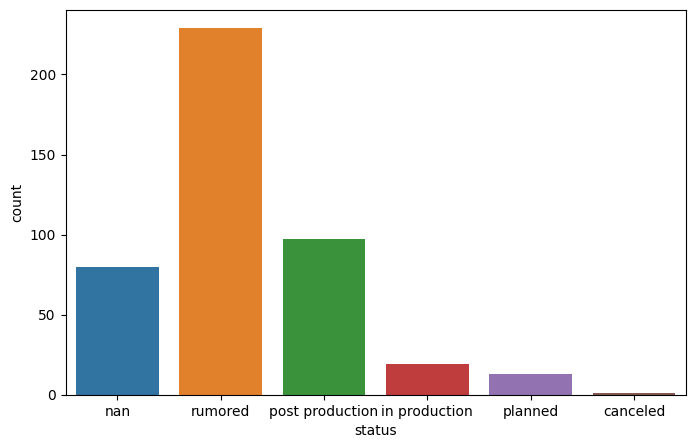

In [39]:
#Revisamos la cantidad de registros por categoria en la columna status
plt.figure(figsize = (8,5))
sns.countplot(x=data['status'][data['status']!='released'])
plt.show()

In [40]:
# revisamos si los registros nulos en status tienen inf importante
data[['title','release_year','runtime','status','vote_count','tagline','overview']][(data['status'].isna())].sort_values('release_year', ascending=False)

,title,release_year,runtime,status,vote_count,tagline,overview


In [41]:
# eliminamos los registros cuyas peliculas estan etiquetadas como rumored, canceled o vacias
data=data.drop(data[(data['status']=='canceled') | (data['status']=='rumored') | (data['status']=='nan')].index)

In [42]:
data.shape #45035 registros

(45035, 21)

revisamos las columnas basadas en calificacion de la pelicula `vote_average` , `vote_count` y `popularity` para determinar si hay valores atipicos

In [43]:
data['vote_count'].describe()

count    45035.000000
mean       110.856045
std        493.517396
min          0.000000
25%          3.000000
50%         10.000000
75%         35.000000
max      14075.000000
Name: vote_count, dtype: float64

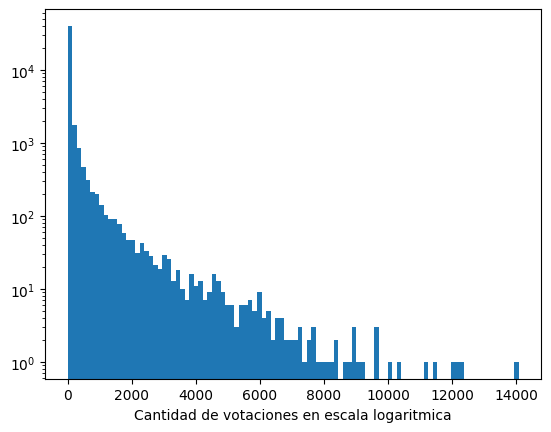

In [44]:
#realizar histograma para ver la frecuencia de cada puntuacion
plt.hist(data['vote_count'],log=True, bins= 100) #[data['vote_count']>3000]
plt.xlabel('Cantidad de votaciones en escala logaritmica')
plt.show()

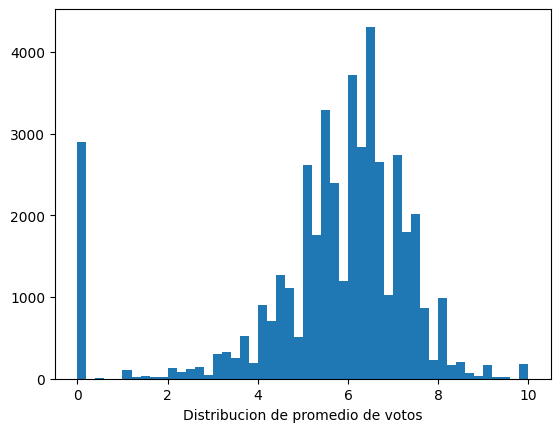

In [45]:
#realizamos histograma para ver la frecuencia de promedio de votos
plt.hist(data['vote_average'], bins= 50)
plt.xlabel('Distribucion de promedio de votos')
plt.show()

In [46]:
data['popularity'].describe()

count    45035.000000
mean         2.942456
std          6.027800
min          0.000000
25%          0.394581
50%          1.139297
75%          3.731156
max        547.488298
Name: popularity, dtype: float64

In [47]:
data[['vote_average','vote_count','popularity']][data['popularity']>200].value_counts()

vote_average  vote_count  popularity
6.4           4729.0      547.488298    1
6.8           5530.0      287.253654    1
7.2           2083.0      228.032744    1
              5025.0      294.337037    1
7.8           6289.0      213.849907    1
Name: count, dtype: int64

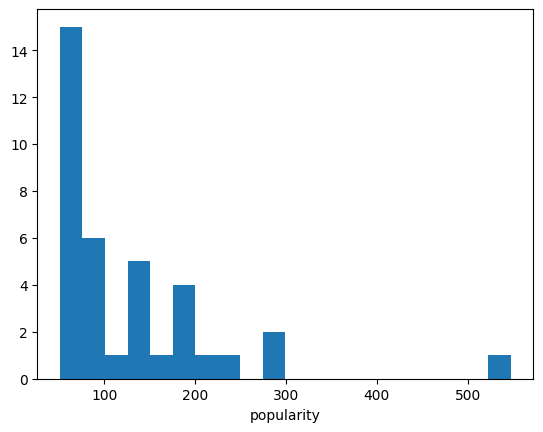

In [48]:
#realizar histograma para ver valores atipicos
plt.hist(data['popularity'][data['popularity']>50], bins= 20)
plt.xlabel('popularity')
plt.show()

In [49]:
#Revisamos los registros sin puntuacion
data[['title','release_year','status','overview','genres']][(data['vote_count']==0.0) & (data['vote_average']==0.0) & (data['popularity']==0.0)]

,title,release_year,status,overview,genres
5631,Night of the Zombies,1981,released,investigators search for soldiers' missing bod...,[Horror]
13023,My Sons,1991,released,"tetsuo is a young man living in tokyo, who fal...",[]
14878,Lars i porten,1984,released,no overview,[]
18325,The Last Ferry,1989,released,directed by,[]
18521,Casual Relations,1974,released,in rappaport’s dazzling and bizarre feature-le...,[Drama]
20110,Jean Renoir: Part One - From La Belle Époque t...,1993,released,part one of a bbc documentary about jean renoir.,[Documentary]
20242,Preston Sturges: The Rise and Fall of an Ameri...,1990,released,documentary about the life and work of film di...,[Documentary]
20687,Business as Usual,1987,released,after seeing her husband fail in fighting a ba...,[Drama]
20734,The Castle of Cloads,1970,released,teenager erik returns from paris to finland in...,"[Drama, Comedy]"
20971,At the River I Stand,1993,released,this moving documentary recounts the two month...,[]


In [50]:
data[['title','release_year','status','overview','genres','vote_count']][(data['popularity']>300)]

,title,release_year,status,overview,genres,vote_count
30644,Minions,2015,released,"minions stuart, kevin and bob are recruited by...","[Family, Animation, Adventure, Comedy]",4729.0


- Se tienen 20 registros sin puntuacion ('vote_count','vote_average','popularity' igual a cero), lo cual es de esperarse porque el anio de estreno mas actual  es 1993 (son peliculas muy viejas)
- La pelicula con mayor popularidad es Minions, pero ademas tiene mayor cantidad de votos y es una pelicula del anio 2015 que tuvo mucha popularidad en su estreno, por lo que no se considera un valor atipico.

Analizamos en anio de estreno `release_year` y `runtime`

In [51]:
data['runtime'].value_counts()

runtime
90.0     2533
0.0      1497
100.0    1458
95.0     1402
93.0     1204
         ... 
370.0       1
680.0       1
289.0       1
720.0       1
780.0       1
Name: count, Length: 353, dtype: int64

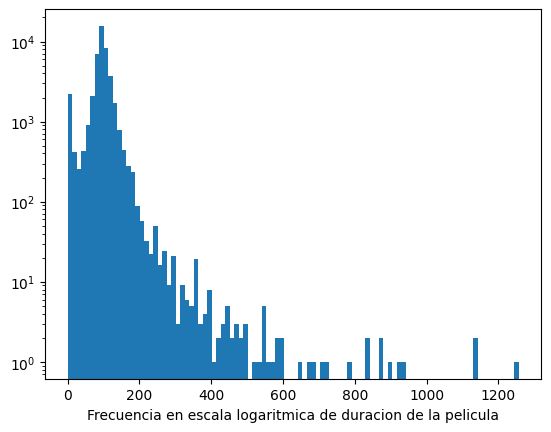

In [52]:
#realizar histograma para ver valores atipicos
plt.hist(data['runtime'], log=True, bins= 100)
plt.xlabel('Frecuencia en escala logaritmica de duracion de la pelicula')
plt.show()

In [53]:
data[['title','release_year','status','runtime','genres']][(data['runtime']==0) & (data['status']!='released')]

,title,release_year,status,runtime,genres
21699,America The Beautiful 2: The Thin Commandments,2011,post production,0.0,[Documentary]
25412,1987,2014,post production,0.0,"[Comedy, Drama]"
26512,Avatar 2,2020,in production,0.0,"[Action, Adventure, Fantasy, Science Fiction]"
26514,Justice League,2017,post production,0.0,"[Action, Adventure, Fantasy, Science Fiction]"
26518,Thor: Ragnarok,2017,post production,0.0,"[Action, Adventure, Fantasy, Science Fiction]"
30347,Bad Boys for Life,2018,planned,0.0,"[Thriller, Action, Crime]"
30481,The King's Daughter,2017,post production,0.0,"[Fantasy, Action, Adventure]"
33296,Sly Cooper,2017,in production,0.0,"[Animation, Adventure, Comedy, Action, Family]"
33297,Iron Sky: The Coming Race,2018,post production,0.0,"[Action, Comedy, Fantasy, Science Fiction]"
33308,Pitch Perfect 3,2017,in production,0.0,[Comedy]


In [54]:
data[['title','release_year','status','runtime','genres','tagline','overview']][(data['runtime']>600)]

,title,release_year,status,runtime,genres,tagline,overview
9111,From the Earth to the Moon,1998,released,720.0,"[Documentary, Drama]",unknown,"tom hanks, imagine entertainment and hbo prese..."
13757,Berlin Alexanderplatz,1980,released,931.0,[Drama],unknown,"berlin alexanderplatz, originally broadcast in..."
13942,Heimat: A Chronicle of Germany,1984,released,925.0,"[Drama, History]",unknown,this epic tale of a family and their rural lif...
18607,The Civil War,1990,released,680.0,[Documentary],it divided a country. it created a nation.,this highly acclaimed mini series traces the c...
19136,The War,2007,released,874.0,"[Documentary, History, War]",unknown,the war is a seven episode documentary miniser...
19939,Jazz,2001,released,1140.0,[Documentary],unknown,a survey of the musical form's history and maj...
24133,Centennial,1978,released,1256.0,"[Drama, History]",unknown,the economic and cultural growth of colorado s...
26634,Taken,2002,released,877.0,[Science Fiction],some secrets we keep. some are kept from us,"taken spans five decades and four generations,..."
27806,The Story of Film: An Odyssey,2011,released,900.0,[Documentary],unknown,"the story of film: an odyssey, written and dir..."
31344,"I, Claudius",1976,released,669.0,"[Drama, History]",unknown,"tracing the lives of several roman emperors, t..."


- Hay muchos valores con runtime igual a cero, de los cuales 20 estan etiquetados con status igual a Post Production, In Production, Planned.
- Las peliculas con runtime elevado es porque pertenecen a generos como drama, documentales, historia, por lo que no se cosideran outliers.
- Para poder aplicar el modelo de ML procedemos a descartar estos registros.

In [55]:
data[['title','release_year','status','tagline','overview','genres']][(data['runtime'].isna()) & (data['release_year']>2000) &  (data['status']=='Released')]
#de 242 registros nulos, solo 137 fueron estrenadas en este siglo y tienen estatus Released (es decir, 137/242 datos son importantes)
# para no eliminarlos y perder informacion relevante, los sustituimos por cero

data['runtime']=data['runtime'].fillna(0)

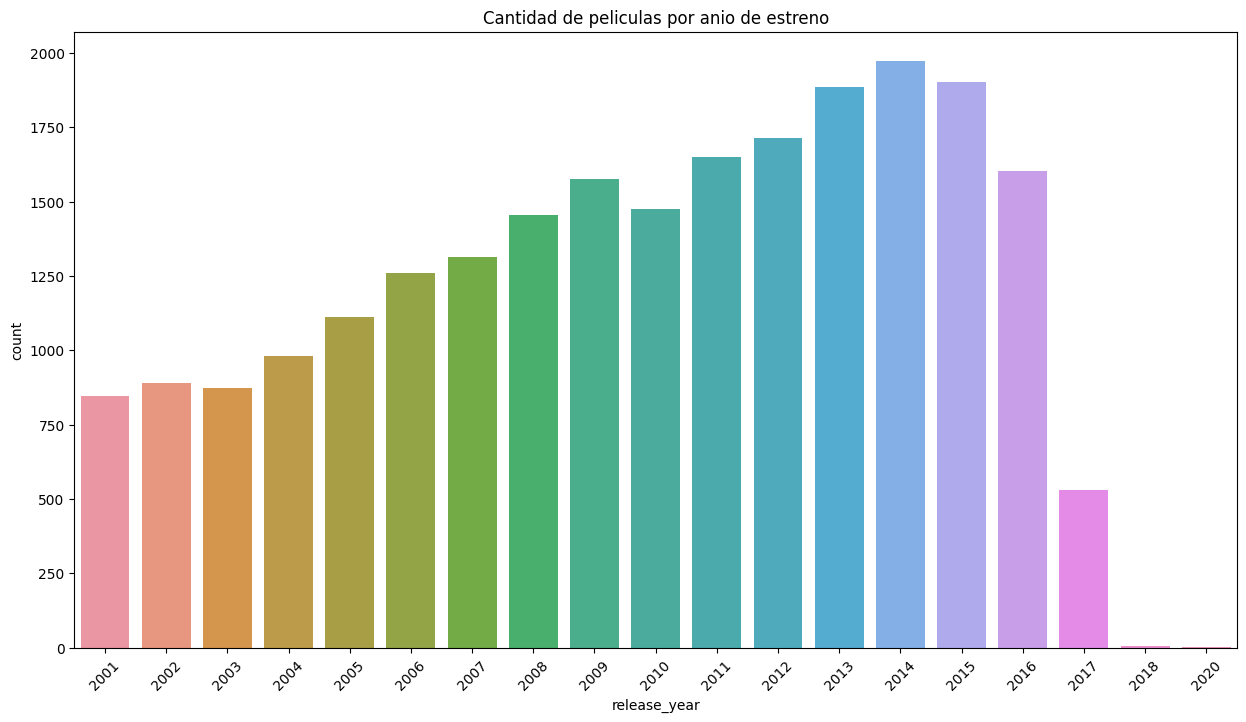

In [56]:
plt.figure(figsize = (15,8))
plot = sns.countplot(x=data['release_year'][data['release_year']>2000])
plt.xticks(rotation=45)
plt.title('Cantidad de peliculas por anio de estreno')
plt.show()

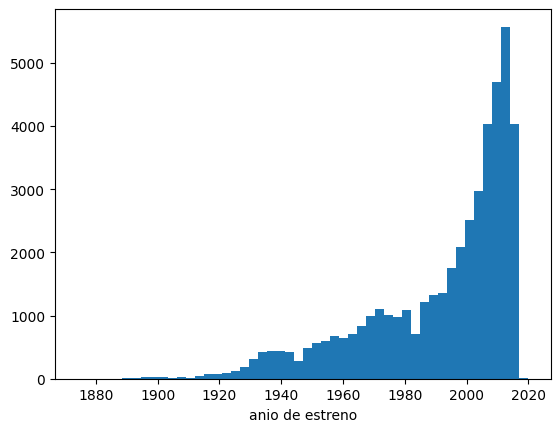

In [57]:
#realizamos un histograma
plt.hist(data['release_year'], bins= 50)
plt.xlabel('anio de estreno')
plt.show()

- Se puede observar que la mayor cantidad de peliculas estrenadas se encuentran entre 1990-2017. Por lo que se va a aplicar el modelo restringido para fecha de estreno de 1990 en adelante.
- Por otro lado, el anio de estreno mas bajo está dentro del rango donde inició el mundo cinematografico, por lo que tampoco se considera outliers.

In [58]:
data.shape

(45035, 21)

In [59]:
data[data['return']>10]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,...,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,cast,crew
0,toy story collection,30000000,"[Animation, Comedy, Family]",862,en,"led by woody, andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],373554033,...,[English],released,unknown,Toy Story,7.7,5415.0,12.451801,1995,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
24,unknown,3600000,"[Drama, Romance]",451,en,"ben sanderson, an alcoholic hollywood screenwr...",10.332025,"[United Artists, Intial Productions]",[United States of America],49800000,...,[English],released,i love you... the way you are.,Leaving Las Vegas,7.1,365.0,13.833333,1995,"[Nicolas Cage, Elisabeth Shue, Julian Sands, R...",[Mike Figgis]
109,unknown,1300000,"[Crime, Drama]",103,en,a mentally unstable vietnam war veteran works ...,14.092713,"[Columbia Pictures Corporation, Italo/Judeo Pr...",[United States of America],28262574,...,"[English, Español]",released,"on every street in every city, there's a nobod...",Taxi Driver,8.1,2632.0,21.740442,1976,"[Robert De Niro, Cybill Shepherd, Harvey Keite...",[Martin Scorsese]
219,clerks collection,27000,[Comedy],2292,en,convenience and video store clerks dante and r...,10.513367,"[Miramax Films, View Askew Productions]",[United States of America],3151130,...,[English],released,just because they serve you doesn't mean they ...,Clerks,7.4,769.0,116.708519,1994,"[Brian O'Halloran, Jeff Anderson, Jason Mewes,...",[Kevin Smith]
227,dumb and dumber collection,16000000,[Comedy],8467,en,lloyd and harry are two men whose stupidity is...,9.844558,"[New Line Cinema, Motion Picture Corporation o...",[United States of America],247275374,...,[English],released,"what the one doesn't have, the other is missing.",Dumb and Dumber,6.5,1894.0,15.454711,1994,"[Jim Carrey, Jeff Daniels, Lauren Holly, Teri ...","[Peter Farrelly, Bobby Farrelly]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43470,bahubali collection,18000000,"[Action, Adventure, History, War]",350312,te,"when mahendra, the son of bahubali, learns abo...",9.042261,[Arka Media Works],[India],230000000,...,"[தமிழ், తెలుగు]",released,unknown,Baahubali 2: The Conclusion,6.7,161.0,12.777778,2017,"[Prabhas, Rana Daggubati, Sathyaraj, Anushka S...",[S.S. Rajamouli]
43523,ирония судьбы (коллекция),5000000,"[Comedy, Drama, Romance]",27046,ru,zhenya and nadya go their separate ways. nadya...,1.792402,[Фокс],[Russia],55635037,...,[Pусский],released,unknown,The Irony of Fate. The Sequel,4.7,24.0,11.127007,2007,"[Konstantin Khabenskiy, Elizaveta Boyarskaya, ...",[Timur Bekmambetov]
43903,despicable me collection,80000000,"[Action, Animation, Adventure, Family, Comedy]",324852,en,gru and his wife lucy must stop former '80s ch...,36.631519,[Illumination Entertainment],[United States of America],1020063384,...,[English],released,oh brother.,Despicable Me 3,6.2,2002.0,12.750792,2017,"[Steve Carell, Kristen Wiig, Trey Parker, Mira...","[Kyle Balda, Pierre Coffin]"
44140,unknown,82000,"[Drama, Fantasy, Horror, Science Fiction]",43228,en,a meat-eating teenager (michael landon) sees a...,0.756840,[Sunset Productions],[United States of America],2000000,...,[English],released,explosive! amazing! terrifying! you won't beli...,I Was a Teenage Werewolf,5.2,12.0,24.390244,1957,"[Michael Landon, Yvonne Fedderson, Whit Bissel...",[Gene Fowler Jr.]


Para el sistema de recomendacion creamos un dataset donde nos quedamos con las columnas mas importantes para aplicar ML

In [60]:
data.shape

(45035, 21)

In [61]:
# tomamos los datos desde release year 2000 y con runtime mayor a cero y menor a 500 minutos
data_ML=data[['id','title','genres','overview','tagline','cast','crew']][(data['vote_count']>150) & (data['runtime']!=0)]

In [63]:
data_ML.shape

(4711, 7)

In [64]:
data_ML.head()

,id,title,genres,overview,tagline,cast,crew
0,862,Toy Story,"[Animation, Comedy, Family]","led by woody, andy's toys live happily in his ...",unknown,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter]
1,8844,Jumanji,"[Adventure, Fantasy, Family]",when siblings judy and peter discover an encha...,roll the dice and unleash the excitement!,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston]
4,11862,Father of the Bride Part II,[Comedy],just when george banks has recovered from his ...,just when his world is back to normal... he's ...,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer]
5,949,Heat,"[Action, Crime, Drama, Thriller]","obsessive master thief, neil mccauley leads a ...",a los angeles crime saga,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...",[Michael Mann]
8,9091,Sudden Death,"[Action, Adventure, Thriller]",international action superstar jean claude van...,terror goes into overtime.,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...",[Peter Hyams]


In [65]:
data_ML.shape

(4711, 7)

In [66]:
data_ML.to_csv('df_ML.csv', sep = ',', encoding='utf8', index = False)